In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sal=pd.read_csv("Salary.csv")
sal

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
sal.shape

(35, 2)

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

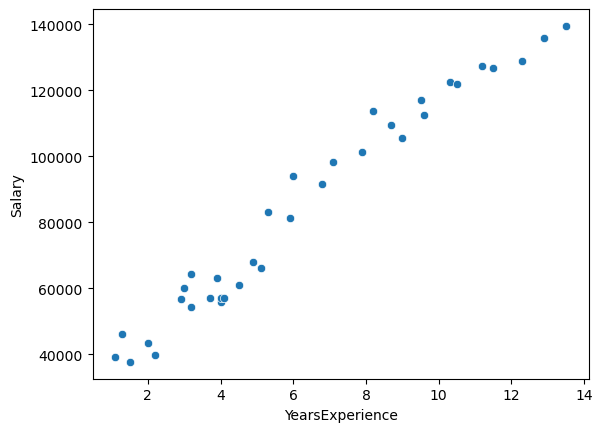

In [6]:
sns.scatterplot(data=sal,x="YearsExperience",y="Salary")

In [7]:
x=sal.drop("Salary",axis=1)
y=sal["Salary"]

In [8]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [9]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=84)

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28, 1), (7, 1), (28,), (7,))

In [12]:
from sklearn.linear_model import LinearRegression
sal_model= LinearRegression()
sal_model.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=sal_model.predict(x_test)
y_pred

array([ 54892.04746551,  46207.50165644,  54023.5928846 ,  87893.32153999,
       118289.23187176, 120026.14103357,  60971.22953186])

In [14]:
y_test

6      60150
3      43525
5      56642
20     91738
28    122391
29    121872
9      57189
Name: Salary, dtype: int64

# Accuracy

In [15]:
sal_model.score(x_test,y_test)*100

98.59377707625315

# RMSE and R2 Score

In [16]:
from sklearn.metrics import r2_score,mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)*100
print("RMSE=",rmse)
print("R2=",r2)

RMSE= 3605.8770601030305
R2= 98.59377707625315


# Actual Data,Predicted Data and Difference between Actual and Predicted Data 

In [17]:
diff=y_test-y_pred
pd.DataFrame(np.c_[y_test,y_pred,diff],columns=['Actual Data','Predicted Data','Difference'])

,Actual Data,Predicted Data,Difference
0,60150.0,54892.047466,5257.952534
1,43525.0,46207.501656,-2682.501656
2,56642.0,54023.592885,2618.407115
3,91738.0,87893.321540,3844.678460
4,122391.0,118289.231872,4101.768128
5,121872.0,120026.141034,1845.858966
6,57189.0,60971.229532,-3782.229532


# Visualize the trained data

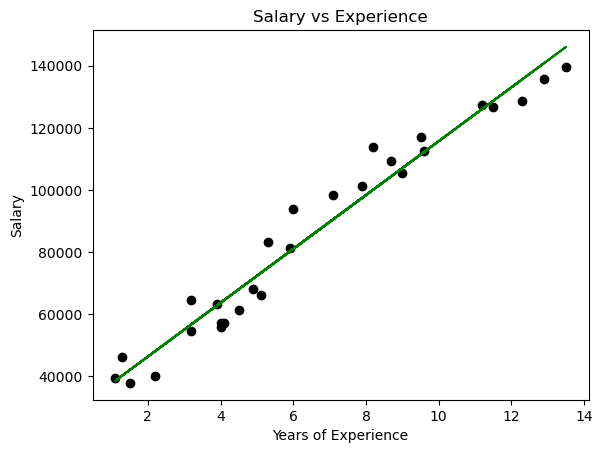

In [18]:
plt.scatter(x_train,y_train,color='black')
plt.plot(x_train,sal_model.predict(x_train),color='green')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualize the test data

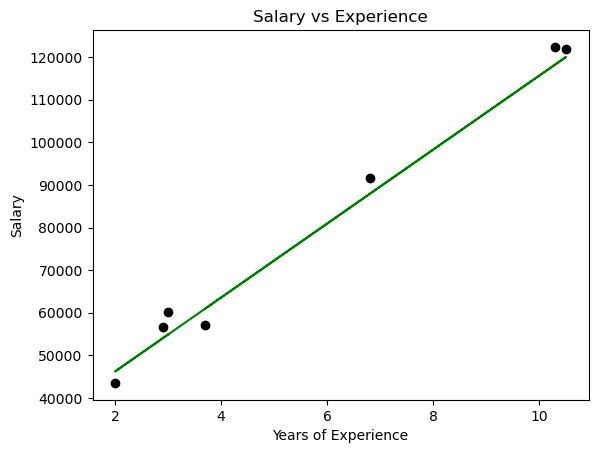

In [19]:
plt.scatter(x_test,y_test,color='black')
plt.plot(x_test,sal_model.predict(x_test),color='green')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [20]:
yr=0
sal_model.predict([[yr]])[0]
print(f"Salary of {yr} year experience employee = {sal_model.predict([[yr]])[0]} Rupees")

Salary of 0 year experience employee = 28838.41003828912 Rupees


C:\Users\devid\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\devid\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
import pickle as pkl
filename="sal_model.sav"
pkl.dump(sal_model,open(filename,"wb"))